**Hi there! In this EDA projects we will be performing netflix-titles analysis which is present on kaggle platform itself, we will be using multiple libraries in this project which will help us in analysing and visualizing our dataset. Visualizing is important as it helps people/developers see, interact with, and better understand the data**

**Libraries to be used during this project**

In [1]:
import numpy as np   #numpy helps in working with arrays and matrices
import pandas as pd  #pandas helps in reading datasets/making dataframes/manipulating dataframes
import seaborn as sns #seaborn and matplotlib are used for visualization
import matplotlib.pyplot as plt

**Now we will use the netflix-titles dataset and read the data in the form of csv.**

In [2]:
#reading our dataset
a=pd.read_csv('/kaggle/input/netflix-titles/netflix_titles.csv')
a.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


**Now we will see the shape of the data**

In [3]:
a.shape  #gives us the rows and columns of the dataset

(6234, 12)

**Description of data**

In [4]:
a.describe()  #shows some basic stats about our columns

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


**But what does the columns mean and what is it used for?**

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


**Now we will check is there is any null values or missing values in our dataset and why is it necessary?**

In [6]:
#missing values
a.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

**Now we need to adjust data types and fill in the missing values**

In [7]:
#convert the data type from object to datetime
a['date_added']=pd.to_datetime(a['date_added'],dayfirst=True,format='mixed')

In [8]:
a.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


**Handling missing values** (Filling the null values)

In [10]:
a.fillna({
    'rating':'Unavailable',
    'cast':'Unavailable',
    'country':'Unavailable',
    'director':'Unavailable'   
},inplace=True)
a.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [11]:
a[a.date_added.isnull()]  #it will display those columns where we have null values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6223,70204989,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unavailable,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unavailable,Unavailable,Unavailable,NaT,2016,Unavailable,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [12]:
most_recent_entry_date=a['date_added'].max()
a.fillna({'date_added':most_recent_entry_date},inplace=True)

In [13]:
a[a.show_id ==70153412]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6225,70153412,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2020-01-18,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


In [14]:
a[a.show_id ==70153404]  #most recent date gets display instead of null

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6233,70153404,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2020-01-18,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [15]:
a.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
a[a.duration.isnull()]  #no rows have null so nothing is displayed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


****

 **Visualizations**

Let's take a look at types of shows that has been watched on Netflix

In [17]:
a.type.value_counts()  #value_counts method shows the counts of different categories in a given column

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

now we need to visualize graphically

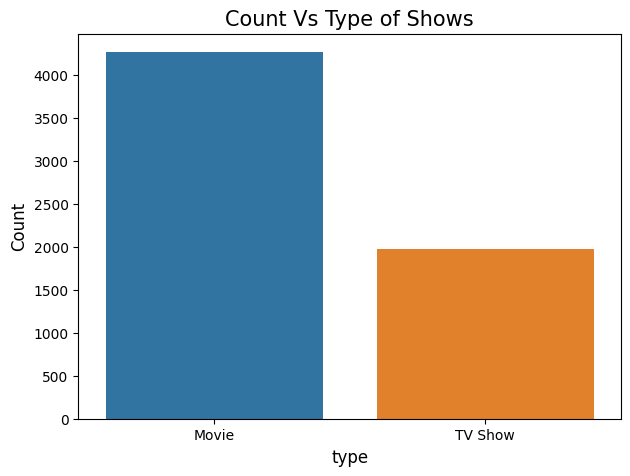

In [18]:
plt.figure(figsize=(7,5))
#countplot helps us to plot counts of each category
sns.countplot(x='type',data=a)    #Note here we are using seaborn as sns which is an in-built library in python that uses matplotlib underneath to plot graphs.

plt.title('Count Vs Type of Shows',fontsize=15)  #labelling the data
plt.ylabel('Count',fontsize=12)                 #labelling the y-label
plt.xlabel('type',fontsize=12)                 #labelling the x-label
plt.show()

This shows us that on Netflix there are more no. of movies as compared to Tv shows

**Country Analysis**-(country wise we want to see how many movies and tv shows are in netflix)

In [19]:
a['country'].value_counts().head(10)  #it is showing top 10 country who produce content to netflix

country
United States     2032
India              777
Unavailable        476
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Name: count, dtype: int64

Text(0.5, 1.0, 'Country Wise Content on Netflix')

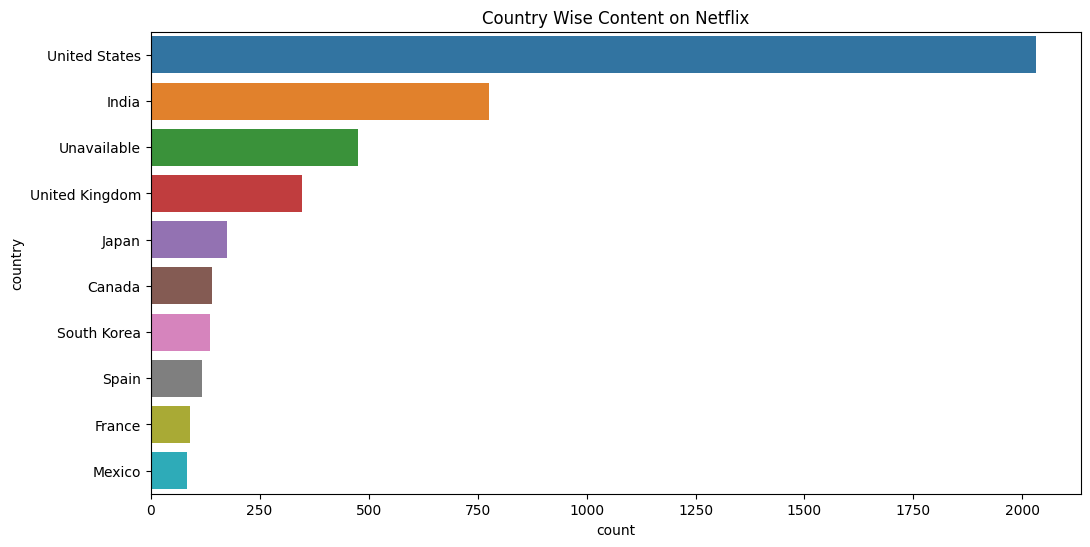

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',order=a['country'].value_counts().index[0:10],data=a)
plt.title('Country Wise Content on Netflix')

This is a combined graph which shows the movies and tv shows produced on netflix.United State is the Country where more content is produce

**Now checking type of content based on country separtely for movies and tv shows**

In [21]:
movie_countries=a[a['type']=='Movie']
tv_show_countries=a[a['type']=='TV Show']  

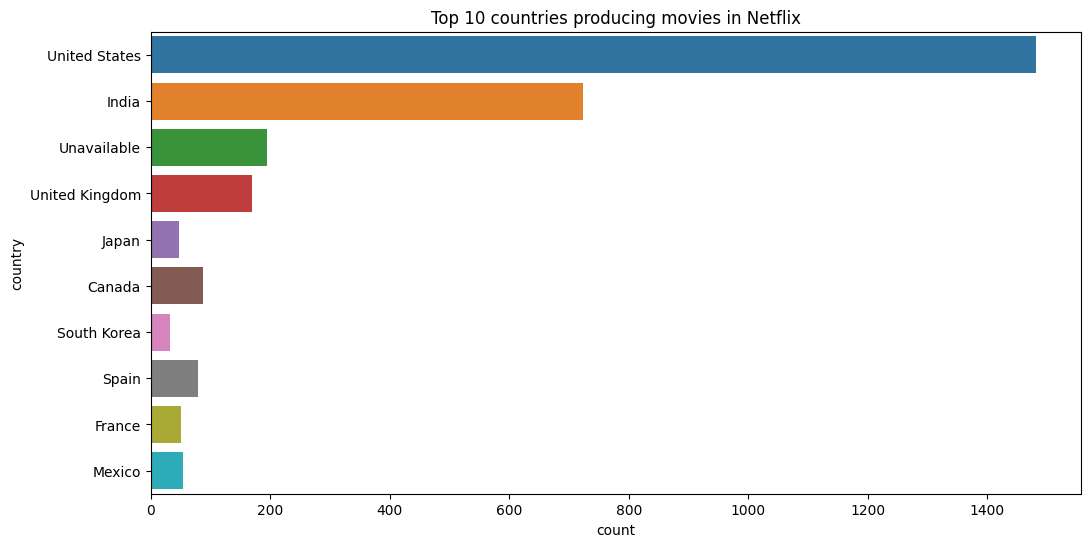

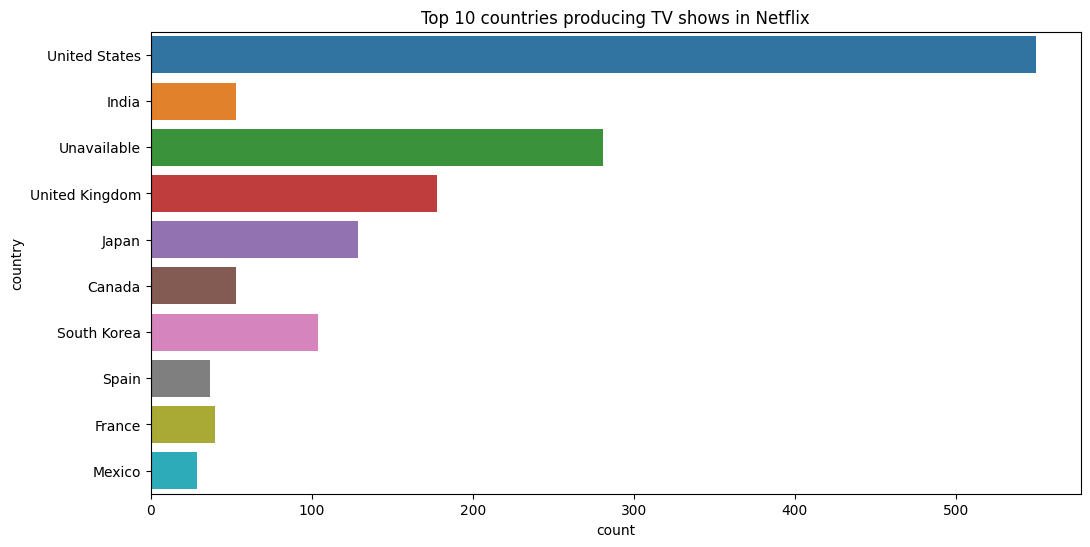

In [22]:
plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = a['country'].value_counts().index[0:10],data = movie_countries)
plt.title('Top 10 countries producing movies in Netflix')
plt.show()



plt.figure(figsize = (12,6))
sns.countplot(y = 'country',order = a['country'].value_counts().index[0:10],data = tv_show_countries)
plt.title('Top 10 countries producing TV shows in Netflix')
plt.show()

so both the graphs shows that the top 10 countries which produces tv and movie shows in countries .
so United State is the country which produces most of the content in netflix whether its movies or tv shows and next is India.

**Let's check what are the major ratings given to netflix shows**

In [23]:
a.rating.value_counts()

rating
TV-MA          2027
TV-14          1698
TV-PG           701
R               508
PG-13           286
NR              218
PG              184
TV-Y7           169
TV-G            149
TV-Y            143
TV-Y7-FV         95
G                37
Unavailable      10
UR                7
NC-17             2
Name: count, dtype: int64

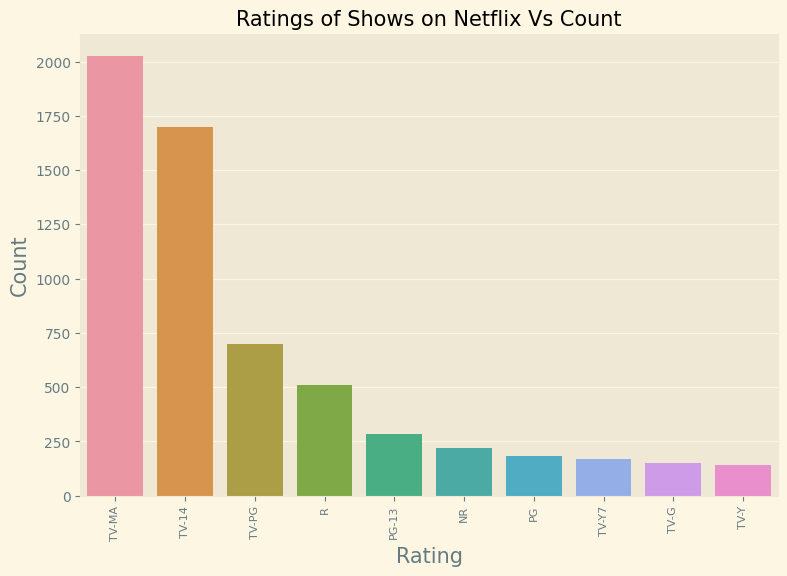

In [24]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=a['rating'].value_counts().index[0:10],data=a)
plt.title('Ratings of Shows on Netflix Vs Count',fontsize=15)
plt.xticks(rotation='vertical',fontsize=8)
plt.ylabel('Count',fontsize=15)          
plt.xlabel('Rating',fontsize=15) 
plt.show()

we can see that netflix has produced most of the content for mature audiance (TV-MA) then tv-14 for kids above 13,then tv-pg etc
most of the shows are for tv-ma and tv-14 which have more ratings.

**we want to see in which year did netflix release most of the contents**

In [25]:
a.release_year.value_counts()[:20]  #top 20 years gets displayed

release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
2009     121
2008     107
2007      71
2006      68
2005      63
2004      49
2003      43
2002      38
2001      34
1997      31
Name: count, dtype: int64

let's visualse it now

Text(0.5, 1.0, 'Content Release in Years on Netflix vs Count')

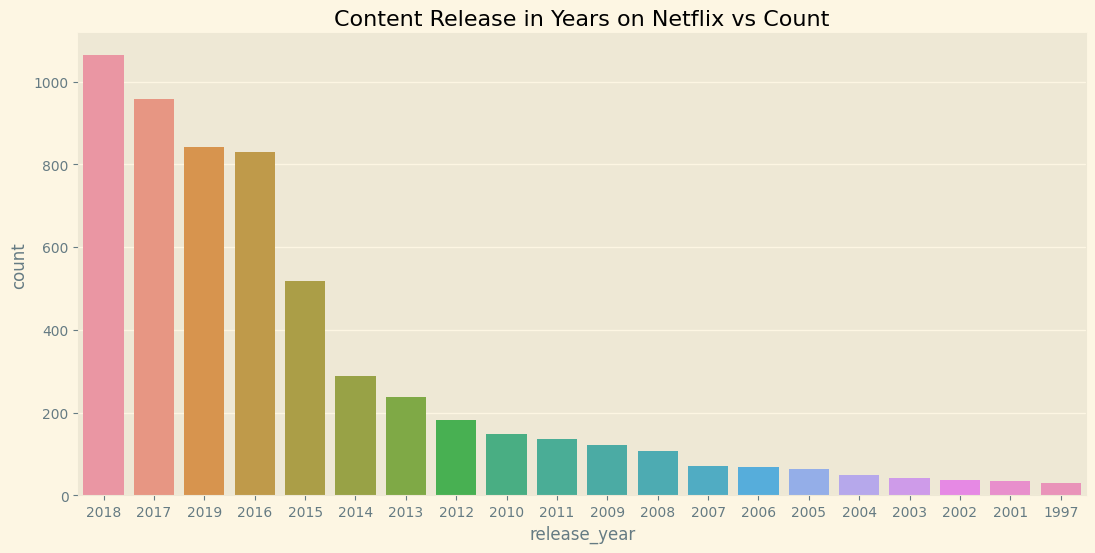

In [26]:
plt.figure(figsize=(13,6))
sns.countplot(x='release_year',order=a['release_year'].value_counts().index[0:20],data=a)
plt.title('Content Release in Years on Netflix vs Count')

it says that most of the content of netflix was release in the year 2018 (both tv shows n movie)

**Popular Genres Analysis** - which genres was watched more

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

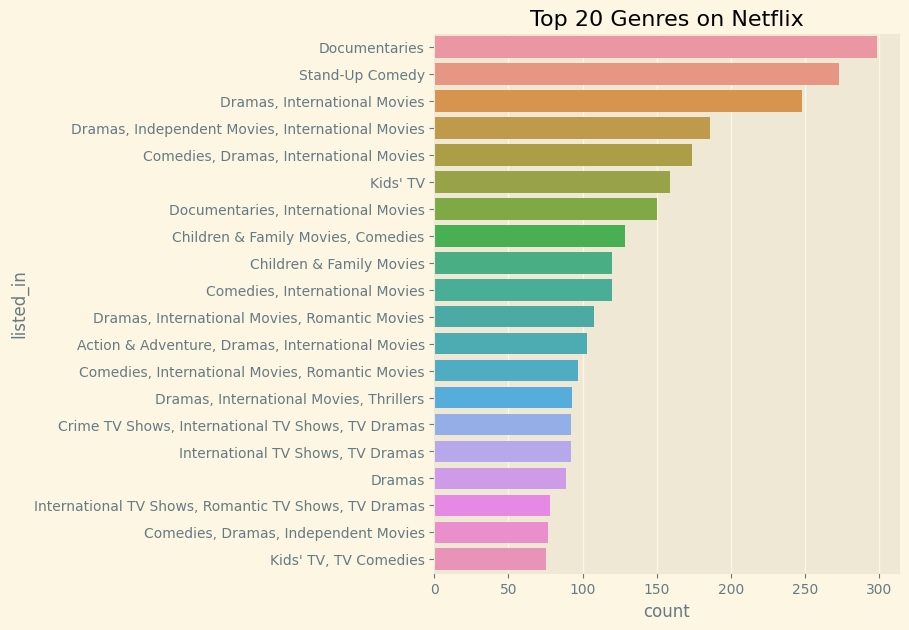

In [27]:
plt.figure(figsize=(6,7))
sns.countplot(y='listed_in',order=a['listed_in'].value_counts().index[0:20],data=a)
plt.title('Top 20 Genres on Netflix')

for this we can say that the most popular genre in netflix is documentaries

**Summary**

So far we had perform lots of opeartions over the dataset to dig out some very useful information from it.If we have to conclude the dataset in few line,then we can say that:

* Netflix has more Movies than TV Shows
* Most number of Movies and TV Shows are produced by United States,followed by India who has produced the second most number of movies on Netflix
* Most of the content on Netflix(Movies and TV Shows combined) is for Mature Audiences
* 2018 is the year in which Netflix released alot more content as compared to other years
*documentaries is the most popular Genres on Netflix